## Bike Share Prediction Project

#### - by Prachi Kharat

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, mean_absolute_error, r2_score

In [2]:
hourly_df = pd.read_csv(r"C:\Users\Prachi\Documents\Software Methods\Bikeshare\Data\hourly.csv")
hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


 #### Objective :
predict the bike-share demand (regression problem)

Models used -Random Forests

## Exploratory Data Analysis

Check if data contains any null values and missing data - 

In [3]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### There are no null values in data.


### Relation of count 'cnt' variable with other features in the data-

- with Hour 

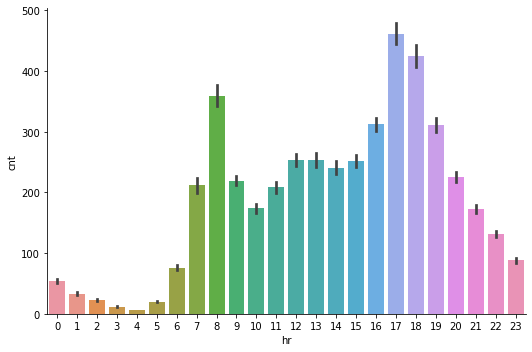

In [4]:
sns.factorplot(x="hr",y="cnt",data=hourly_df,kind='bar',size=5,aspect=1.5)

- by each month

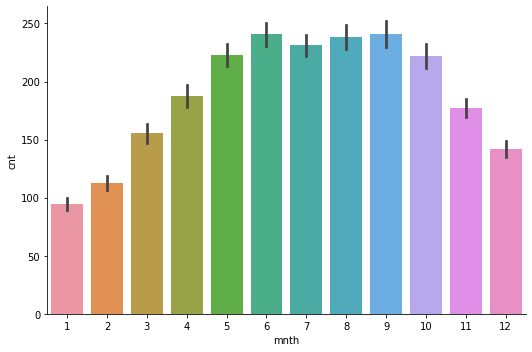

In [5]:
sns.factorplot(x="mnth",y="cnt",data=hourly_df,kind='bar',size=5,aspect=1.5)

- if its working day

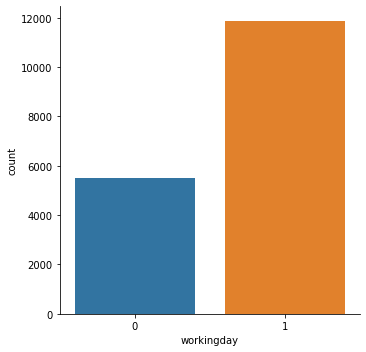

In [6]:
sns.factorplot(x='workingday',data=hourly_df,kind='count',size=5,aspect=1)

### Distribution of Data

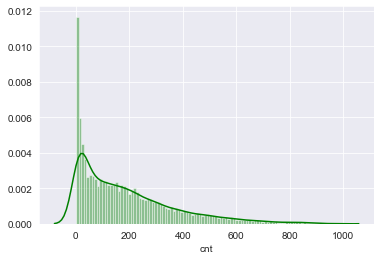

In [7]:
#Histogram for count
sns.set_style('darkgrid')
sns.distplot(hourly_df['cnt'], bins = 100, color = 'green')
plt.show()

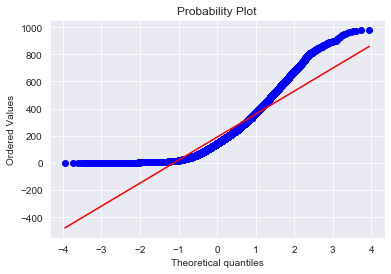

In [8]:
#Q-Q Plot
from scipy import stats
plt = stats.probplot(hourly_df['cnt'], plot=sns.mpl.pyplot)

### Check for outliers 

In [9]:
#Calculating the number of outliers
Q1 = hourly_df['cnt'].quantile(0.25)
Q3 = hourly_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
outliers = hourly_df['cnt'][(hourly_df['cnt'] < (Q1 - 1.5 * IQR)) | (hourly_df['cnt'] > (Q3 + 1.5 * IQR))]
print('Outlier percent :', (len(outliers)/len(hourly_df))*100)

Outlier percent : 2.905805857644283


In [10]:
# remove outliers
hourly_df = hourly_df[np.abs(hourly_df["cnt"]-hourly_df["cnt"].mean())<=(3*hourly_df["cnt"].std())] 

In [11]:
#check correlation 
hourly_df.corr()['cnt']

instant       0.251848
season        0.172056
yr            0.222940
mnth          0.115167
hr            0.400671
holiday      -0.024655
weekday       0.030221
workingday   -0.000315
weathersit   -0.139248
temp          0.397211
atemp         0.394258
hum          -0.324024
windspeed     0.096639
casual        0.710206
registered    0.967613
cnt           1.000000
Name: cnt, dtype: float64

In [12]:
# drop useless columns
hourly_df.drop(['casual','registered','instant','atemp'],axis=1,inplace=True)

In [13]:
# split data into test and train
x = hourly_df.drop('cnt', axis = 1)
y = hourly_df['cnt']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)

In [15]:
# drop dteday column
dates = x_test['dteday']
test_x = x_test.drop('dteday', axis = 1)
x_train = x_train.drop('dteday', axis = 1)

In [16]:
#Normalize the data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
x_train = sc_x.fit_transform(x_train)
test_x = sc_x.fit_transform(test_x)
y_train = sc_x.fit_transform(y_train)
y_test = sc_x.fit_transform(y_test)

In [17]:
# linear regression
lr = LinearRegression().fit(x_train,y_train)
l_pred = lr.predict(test_x)
print('r2_score: ',r2_score(y_test,l_pred))
print('MSE:', mean_squared_error(y_test,l_pred))
print('MAE:', mean_absolute_error(y_test, l_pred))

r2_score:  0.3559727868546624
MSE: 0.03343974388557388
MAE: 0.13685141570983494


## Create Model and evaluate 

In [18]:
rf = RandomForestRegressor().fit(x_train,y_train)
y_pred = rf.predict(test_x)
print('r2_score: ',r2_score(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

r2_score:  0.9361378529222918
MSE: 0.0033159062205333953
MAE: 0.03482058748140794


The model explains 93% of variance in our variables

In [19]:
y_pred=y_pred.reshape(-1,1)
y_pred = sc_x.inverse_transform(y_pred)
y_pred = y_pred.tolist()


In [20]:
results = pd.DataFrame({'Date': dates, 'Count': y_pred})
results  

,Date,Count
15253,2012-10-02,[467.35419178082157]
15739,2012-10-23,[42.24268493150686]
947,2011-02-12,[25.918082191780865]
2256,2011-04-08,[59.68032876712333]
8629,2011-12-31,[72.7259726027398]
...,...,...
16737,2012-12-05,[8.139506849315067]
8145,2011-12-11,[51.818849315068526]
10826,2012-04-01,[7.106684931506852]
5816,2011-09-04,[290.60126027397257]
